# Classification des données - MNIST

## 1. Récupération des données

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8)

## 2. Séparation des données d’entraînement et de test

*Quelle est l’importance de mélanger les données avant de les diviser en ensembles d’entraînement et de test ?*

Il est important de mélanger les données avant de les diviser en ensembles d'entraînement et de test car cela permet d'éviter d'avoir des données qui se suivent dans l'ensemble d'entraînement et dans l'ensemble de test. En effet, si les données sont ordonnées, il est possible d'avoir des données de la même classe dans l'ensemble d'entraînement et dans l'ensemble de test. Cela peut donc poser problème lors de la phase d'entraînement, car le modèle ne sera pas capable de généraliser à des données qu'il n'a pas vu. 

In [5]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

## 3. Visualisation d’une image

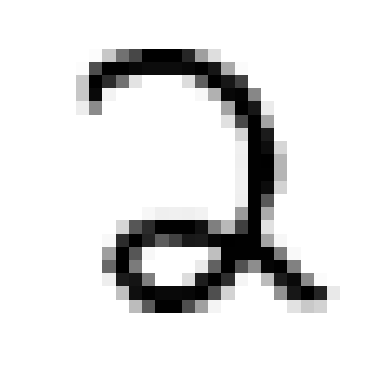

2


In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = trainX[24000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print(trainY[24000])

## 4. Classificateur binaire

In [24]:
from sklearn.linear_model import SGDClassifier

chiffre = 2

trainY_chiffre = (trainY == chiffre)
testY_chiffre = (testY == chiffre)

sgd = SGDClassifier(random_state=42)
sgd.fit(trainX, trainY_chiffre)

SGDClassifier(random_state=42)

*Pourquoi devons-nous créer une variable cible binaire ?*

Nous devons créer une variable cible binaire car nous souhaitons entraîner un classificateur binaire. En effet, nous souhaitons que notre modèle soit capable de prédire si une image représente un 2 ou non.

*Comment entraînons-nous le modèle SGDClassifier pour cette tâche de classification binaire ?*

En l'entrainant sur les données binaires. En effet, nous avons créé une variable cible binaire, nous pouvons donc entraîner le modèle sur ces données.

## 5. Précision et rappel (faux-positif/faux-négatif)

In [28]:
# precision_score & recall_score
from sklearn.metrics import precision_score, recall_score

y_pred = sgd.predict(testX)

print("Precision : ", precision_score(testY_chiffre, y_pred))
print("Recall : ", recall_score(testY_chiffre, y_pred))

Precision :  0.821664464993395
Recall :  0.9014492753623189


*Quelle est la signification de la précision et du rappel dans le contexte de la classification ?*

La précision est le nombre de vrais positifs parmi les prédictions positives. Le rappel est le nombre de vrais positifs parmi les données positives.

*Comment calculons-nous la précision et le rappel ?*

précision = TP / (TP + FP)
rappel = TP / (TP + FN)

Avec TP = True Positive, FP = False Positive, FN = False Negative

## 6. Comparaison avec RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(trainX, trainY_chiffre)

RandomForestClassifier(random_state=42)

In [30]:
y_pred_forest = forest.predict(testX)

print("Precision : ", precision_score(testY_chiffre, y_pred_forest))
print("Recall : ", recall_score(testY_chiffre, y_pred_forest))

Precision :  0.9873417721518988
Recall :  0.9043478260869565


## 7. Classificateur multiclasse

*Comment adaptons-nous notre modèle pour effectuer une classification multiclasse ?*

Nous adaptons notre modèle pour effectuer une classification multiclasse en utilisant la méthode OneVsRestClassifier. Cette méthode permet de transformer un problème de classification multiclasse en un problème de classification binaire. En effet, elle crée un classificateur binaire pour chaque classe.

*Quelles métriques d’évaluation devrions-nous utiliser pour évaluer la performance de ce modèle ?*

Pour évaluer la performance de ce modèle, nous pouvons utiliser la matrice de confusion. En effet, cette matrice permet de voir les prédictions du modèle. Elle permet donc de voir les prédictions correctes et incorrectes du modèle.

In [31]:
from sklearn.multiclass import OneVsRestClassifier

ovr_sgd = OneVsRestClassifier(SGDClassifier(random_state=42))
ovr_sgd.fit(trainX, trainY)

OneVsRestClassifier(estimator=SGDClassifier(random_state=42))

In [39]:
# matrice de confusion
from sklearn.metrics import confusion_matrix

y_ocr_sgd_pred = ovr_sgd.predict(testX)

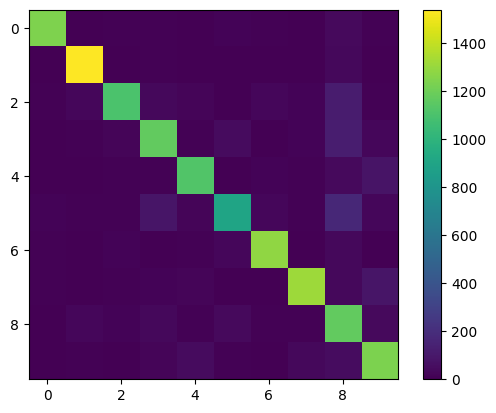

In [41]:
conf_mx = confusion_matrix(testY, y_ocr_sgd_pred)
plt.imshow(conf_mx)
plt.colorbar()
plt.show()

J'essaye avec RandomForestClassifier

In [42]:
ovr_forest = OneVsRestClassifier(RandomForestClassifier(random_state=42))
ovr_forest.fit(trainX, trainY)

OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))

In [43]:
y_ocr_forest_pred = ovr_forest.predict(testX)

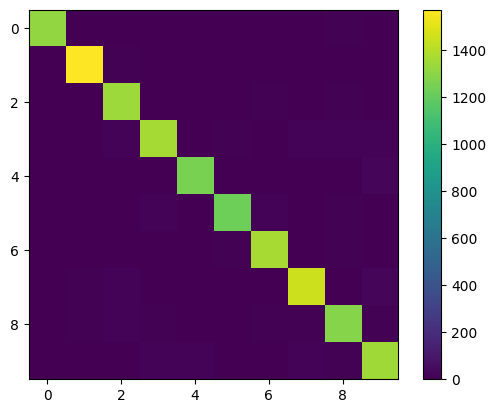

In [44]:
conf_mx = confusion_matrix(testY, y_ocr_forest_pred)
plt.imshow(conf_mx)
plt.colorbar()
plt.show()

Le résultat est plutôt bon, RandomForestClassifier est plus performant que SGDClassifier.